## About Dataset

### Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

### The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Inspiration
- To explore this type of models and learn more about the subject.

New version from IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [3]:
import pandas as pd
import numpy as np


In [4]:
#Load data

df = pd.read_csv("Telco-Customer-Churn.csv")

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#Check types

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.drop("customerID", axis=1, inplace=True)

In [8]:
#Check missing values 

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#Create a copy of the dataframe to transform the categorical values 

df_cat = df.copy()

In [10]:
df_cat.columns.unique()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
#Replace empty row with 1 

df_cat["TotalCharges"] = np.where(df.TotalCharges == " ", 1, 0)

In [12]:
df_cat.TotalCharges = pd.to_numeric(df_cat.TotalCharges)

In [13]:
cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
              'MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
              'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
       ,'Churn']

df_cat[cols] = df_cat[cols].astype("category")

df_cat["gender"] = df_cat["gender"].cat.codes
df_cat["Partner"] = df_cat["Partner"].cat.codes
df_cat["Dependents"] = df_cat["Dependents"].cat.codes
df_cat["PhoneService"] = df_cat["PhoneService"].cat.codes
df_cat["MultipleLines"] = df_cat["MultipleLines"].cat.codes
df_cat["InternetService"] = df_cat["InternetService"].cat.codes
df_cat["OnlineSecurity"] = df_cat["OnlineSecurity"].cat.codes
df_cat["OnlineBackup"] = df_cat["OnlineBackup"].cat.codes
df_cat["DeviceProtection"] = df_cat["DeviceProtection"].cat.codes
df_cat["TechSupport"] = df_cat["TechSupport"].cat.codes
df_cat["StreamingTV"] = df_cat["StreamingTV"].cat.codes
df_cat["StreamingMovies"] = df_cat["StreamingMovies"].cat.codes
df_cat["Contract"] = df_cat["Contract"].cat.codes
df_cat["PaperlessBilling"] = df_cat["PaperlessBilling"].cat.codes
df_cat["PaymentMethod"] = df_cat["PaymentMethod"].cat.codes
df_cat["Churn"] = df_cat["Churn"].cat.codes


df_cat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,0,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,0,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,0,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,0,1


In [14]:
df_cat.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
#Confirm that all categorical values were converted to numerical values 

df_cat.dtypes

gender                 int8
SeniorCitizen         int64
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges          int64
Churn                  int8
dtype: object

In [24]:
#Lets check the distribution between 

print(round(df_cat.Churn.value_counts()/len(df)*100, 2))

0    73.46
1    26.54
Name: Churn, dtype: float64


<AxesSubplot:>

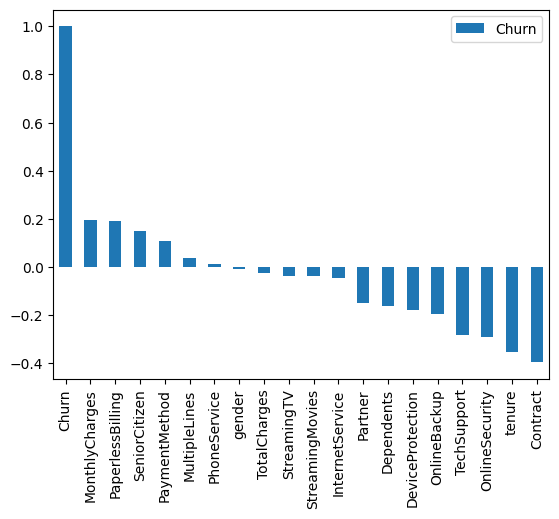

In [19]:
import matplotlib.pyplot as plt 


df_cat.corr()[['Churn']].sort_values("Churn", ascending = False).plot(kind='bar')

<AxesSubplot:>

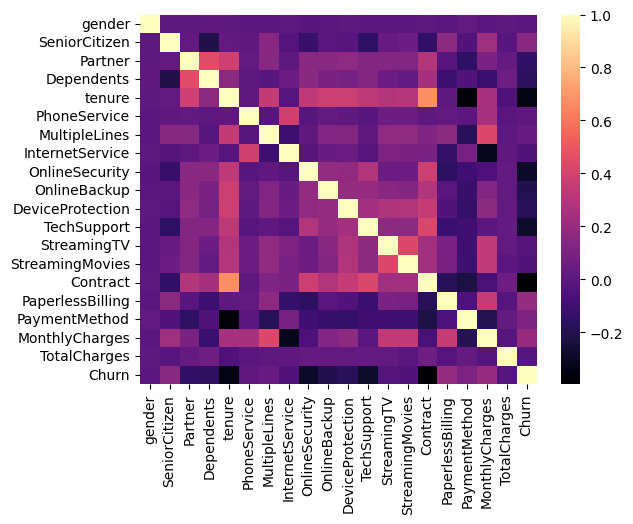

In [20]:
import seaborn as sns

sns.heatmap(df_cat.corr(), cmap="magma", annot=False)

In [21]:
#Now that we have an idea of the correlations, let's do some EDA


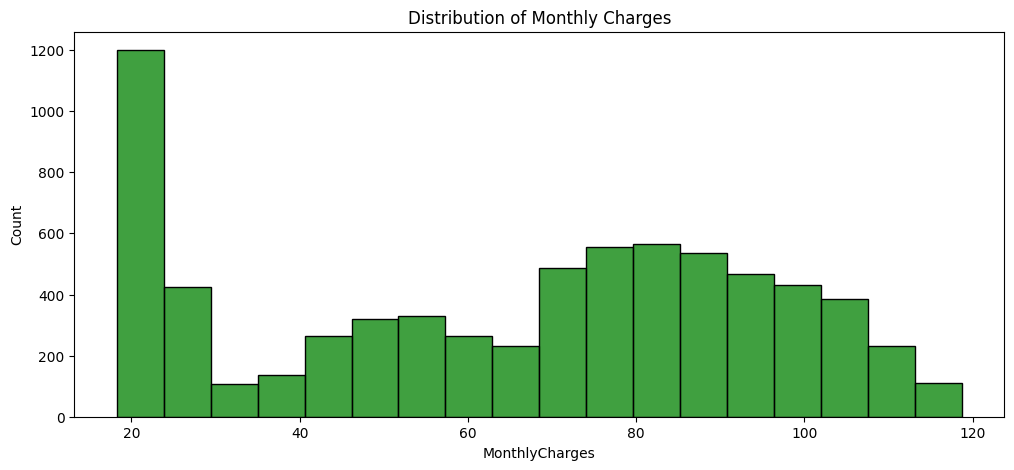

In [22]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Monthly Charges")
ax = sns.histplot(df["MonthlyCharges"], color = 'g')



Text(0.5, 1.0, '% of Senior Citizens')

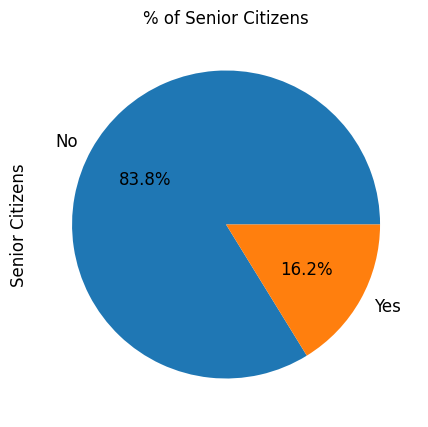

In [23]:
# Lets start observing the seniors 

ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

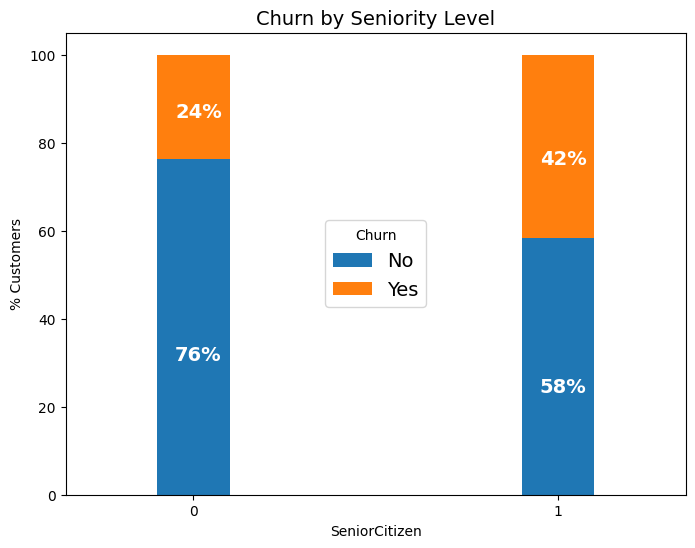

In [24]:

seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6))
                                                                #color = colors)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Churn by Seniority: Senior Citizens have almost double the churn rate than younger population.

Lets have a look on the different contract types 

/tmp/ipykernel_33391/1266588619.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['tenure'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their tenure')

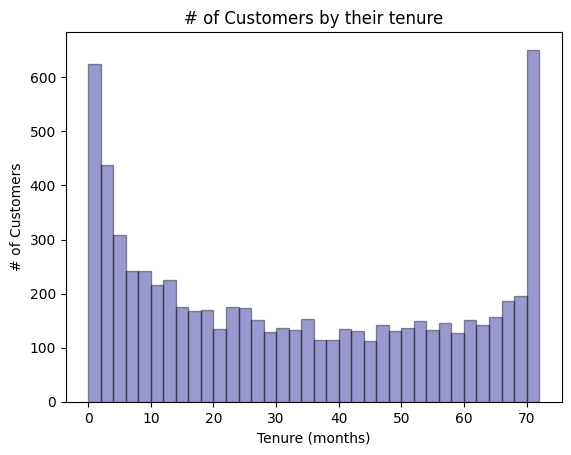

In [25]:
import seaborn as sns

ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by their tenure')

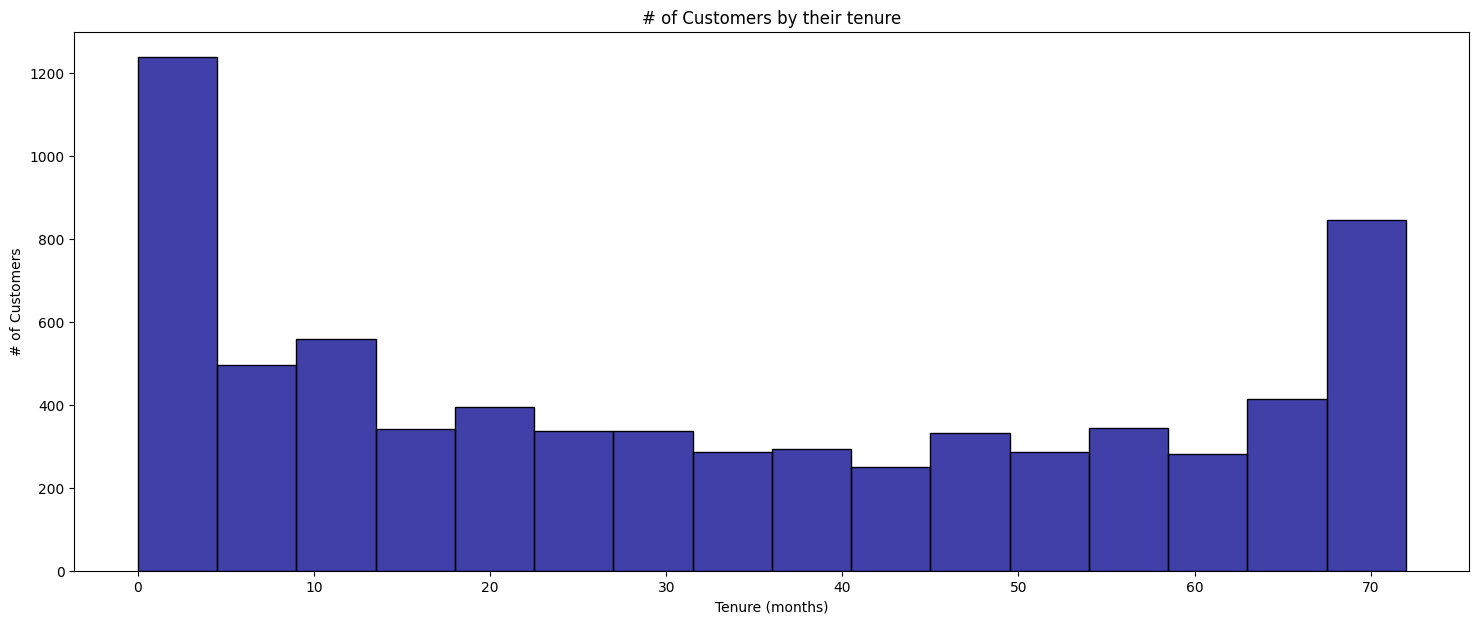

In [26]:
plt.figure(figsize=(18,7))
plt.title("Distribution of Tenure")
ax = sns.histplot(df["tenure"], color = 'darkblue')
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Contracts:


Text(0.5, 1.0, '# of Customers by Contract Type')

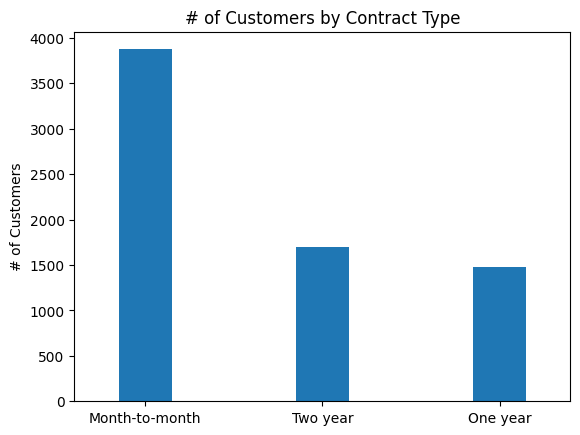

In [27]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Tenure based on contract type

/tmp/ipykernel_33391/238609947.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
/tmp/ipykernel_33391/238609947.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
/tmp/ipykernel_33391/23860994

Text(0.5, 1.0, 'Two Year Contract')

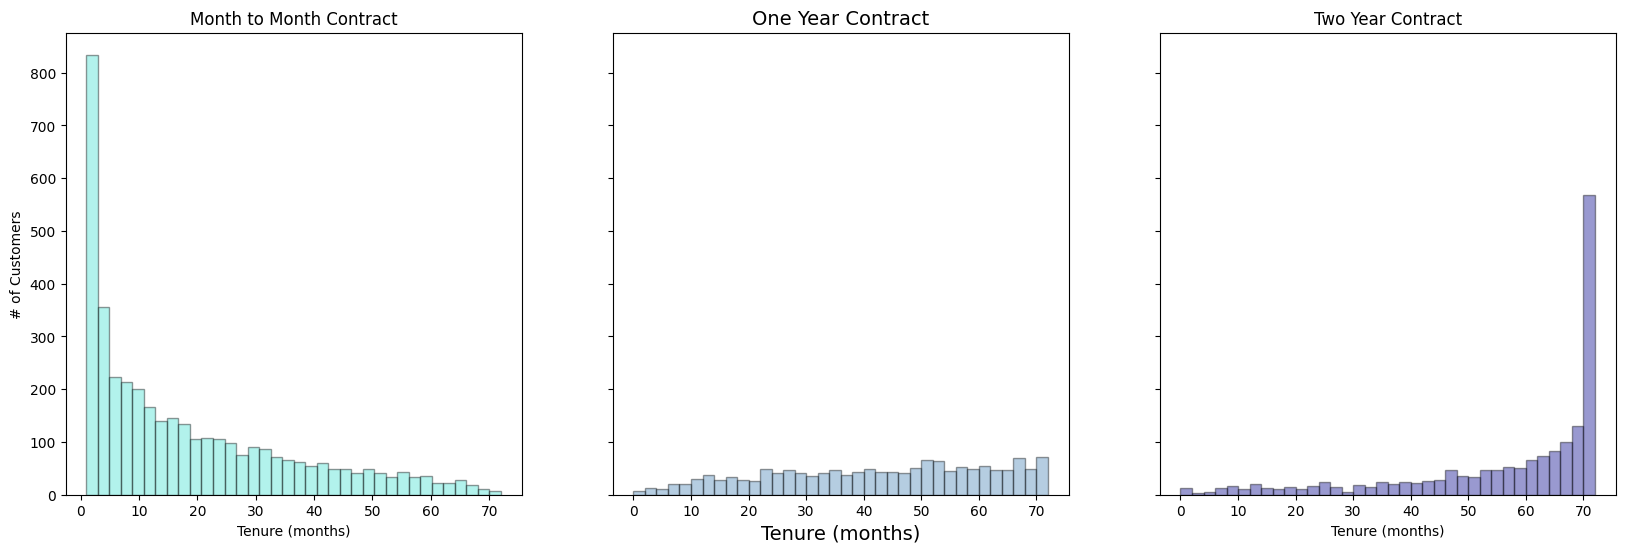

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Churn vs Tenure: As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

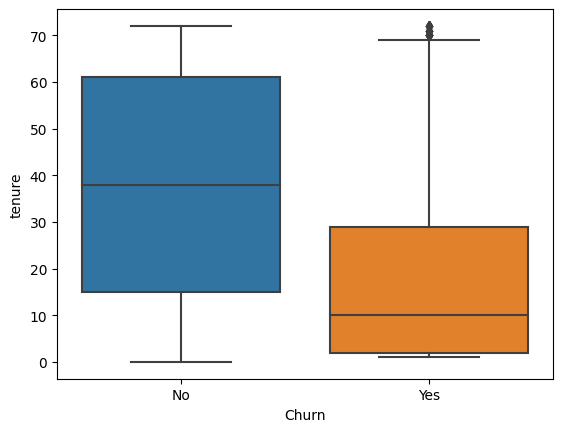

In [29]:
sns.boxplot(x = df.Churn, y = df.tenure)


Churn by Contract Type: Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

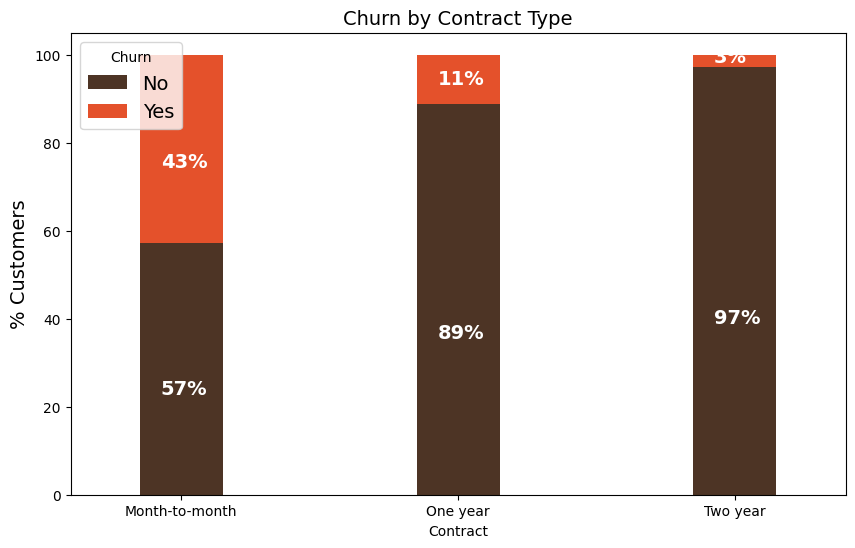

In [30]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Churn by Monthly Charges: Higher % of customers churn when the monthly charges are high.

/tmp/ipykernel_33391/3712693289.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
/tmp/ipykernel_33391/3712693289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

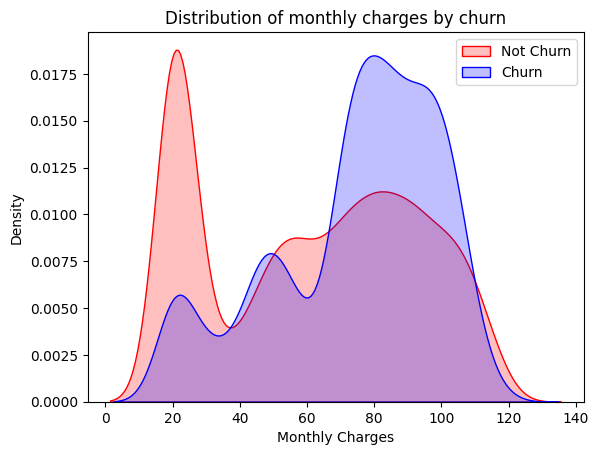

In [31]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Churn by Total Charges: It seems that there is higer churn when the total charges are lower.

In [32]:
#ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
#                color="Red", shade = True)
#ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
#                ax =ax, color="Blue", shade= True)
#ax.legend(["Not Churn","Churn"],loc='upper right')
#ax.set_ylabel('Density')
#ax.set_xlabel('Total Charges')
#ax.set_title('Distribution of total charges by churn')

In [43]:
# We will use the data frame where we had created dummy variables
from sklearn.model_selection import train_test_split


x = df_cat.drop(columns = ['Churn'])
y = df_cat['Churn']


#Split the data into train and test


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [44]:
# Creat the logistic model and train it using statsmodels 

import statsmodels.api as sm


x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

reg_log = sm.GLM(y_train, x_train_, family = sm.families.Binomial())

reg_log = reg_log.fit()

print(reg_log.summary())
print("\n")
print('Parameters: ', reg_log.params)
print("\n")
print("Odds ratio")
print(np.exp(reg_log.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3521
Model:                            GLM   Df Residuals:                     3501
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1496.0
Date:                Wed, 12 Apr 2023   Deviance:                       2992.0
Time:                        13:29:24   Pearson chi2:                 3.61e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2598
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0220      0.217  

In [45]:
# Predict 

from sklearn.metrics import roc_curve, auc


y_pred_train = reg_log.predict(x_train_)

y_pred_test = reg_log.predict(x_test_)

#ROC and Gini - Train
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

print("AUC - Train : %f" % roc_auc_train)
print("Gini - Train: ", round(2*roc_auc_train-1,2))
print("\n")

#ROC and Gini - Test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)

print("AUC - Test : %f" % roc_auc_test)
print("Gini - Test: ", round(2*roc_auc_test-1,2))

AUC - Train : 0.835239
Gini - Train:  0.67


AUC - Test : 0.852893
Gini - Test:  0.71


In [52]:
i = np.arange(len(tpr_train))
roc_train = pd.DataFrame({'fpr' : pd.Series(fpr_train, index=i)
                    , 'tpr' : pd.Series(tpr_train, index = i)
                    , '1-fpr' : pd.Series(1-fpr_train, index = i)
                    , 'tf' : pd.Series(tpr_train - (1-fpr_train), index = i)
                    , 'thresholds' : pd.Series(thresholds_train, index = i)})

print(round(roc_train.loc[(roc_train.tf-0).abs().argsort()[:1]],3))
print("\n")
print("Optimal cutoff point: 0.296 ")

      fpr    tpr  1-fpr     tf  thresholds
601  0.25  0.751   0.75  0.001       0.296


Optimal cutoff point: 0.296 


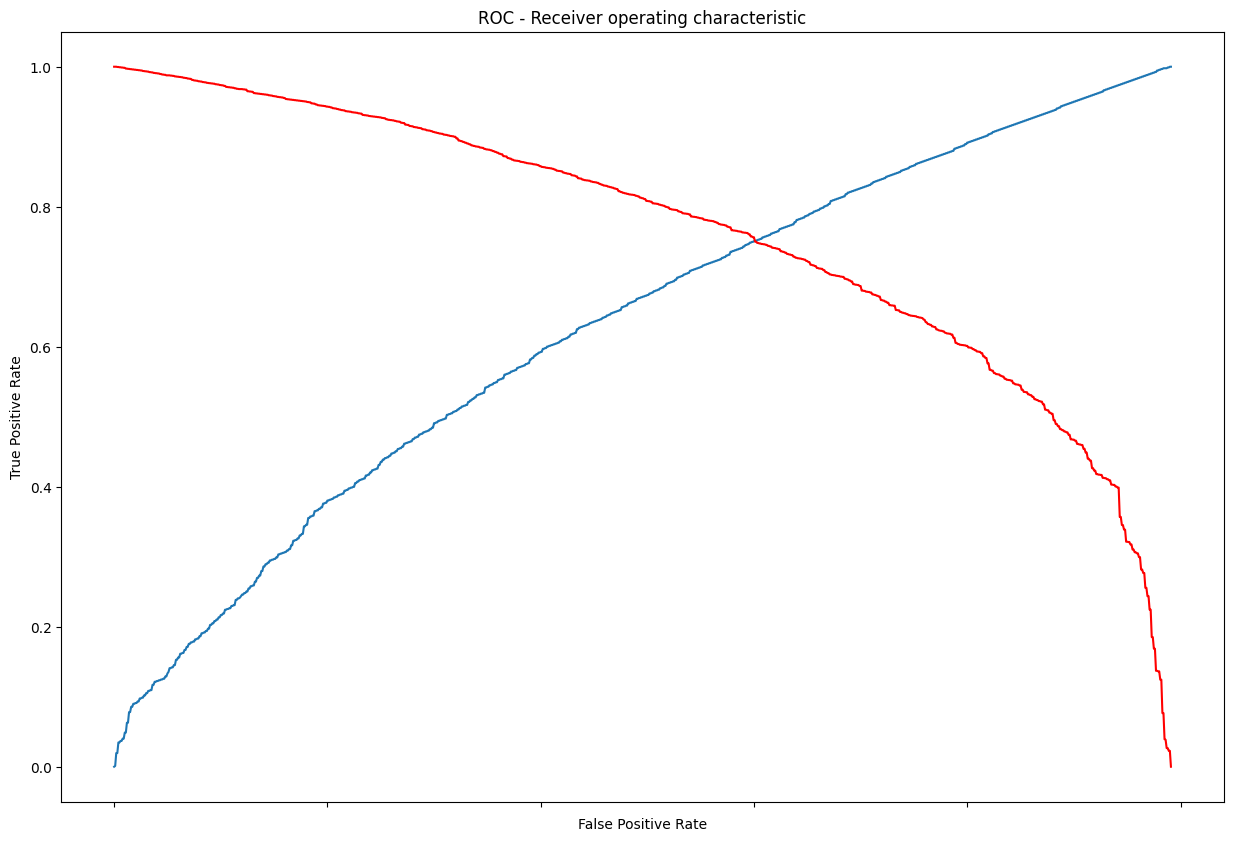

In [53]:
#ROC (AUC) - Train
fig, ax = plt.subplots()
plt.plot(roc_train['tpr'])
plt.plot(roc_train['1-fpr'], color = 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Receiver operating characteristic')
ax.set_xticklabels([]);
plt.gcf().set_size_inches(15, 10)

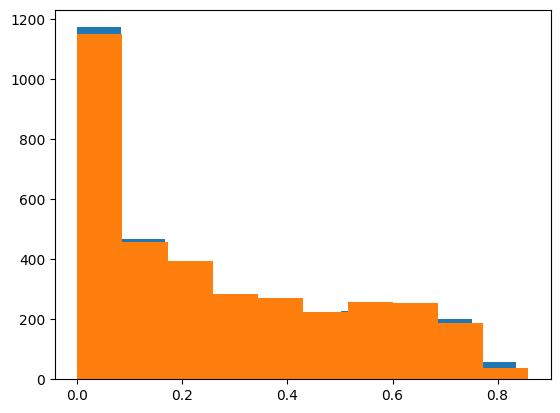

In [48]:
# Adjusting the cutoff point

cutoff = 0.301


plt.hist(y_pred_train)
plt.hist(y_pred_test);



In [49]:
# Converting data to binary data so it can be used by the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred_train_bin = y_pred_train
y_pred_test_bin = y_pred_test

# Transforming all training probabilities
for score in range(0, len(y_pred_train-1)):
    if y_pred_train.iloc[score] >= cutoff:
        y_pred_train_bin.iloc[score] = 1
    else:
        y_pred_train_bin.iloc[score] = 0
        

# Transforming all test probabilities
for score in range(0, len(y_pred_test-1)):
    if y_pred_test.iloc[score] >= cutoff:
        y_pred_test_bin.iloc[score] = 1
    else:
        y_pred_test_bin.iloc[score] = 0

In [51]:
from sklearn.metrics import classification_report

print("Train Evaluation")
print(confusion_matrix(y_train, y_pred_train_bin))
print(classification_report(y_train,y_pred_train_bin))
print("##############################################")
print()
print("Test Evaluation")
print(confusion_matrix(y_test, y_pred_test_bin))
print(classification_report(y_test,y_pred_test_bin))
print("##############################################")

Train Evaluation
[[1968  630]
 [ 231  692]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      2598
           1       0.52      0.75      0.62       923

    accuracy                           0.76      3521
   macro avg       0.71      0.75      0.72      3521
weighted avg       0.80      0.76      0.77      3521

##############################################

Test Evaluation
[[1956  620]
 [ 196  750]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2576
           1       0.55      0.79      0.65       946

    accuracy                           0.77      3522
   macro avg       0.73      0.78      0.74      3522
weighted avg       0.81      0.77      0.78      3522

##############################################
